In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#### Pick 1500 Random Counties for Vaccination Sample (Don't change codes or rerun this section)

In [2]:
# Pull Sep 30th vaccination information by county from CSC dataset. Comment out due to the size of the original dataset

# Vaccinations_in_the_United_States_County_CDC = pd.read_csv("Resources/01 COVID-19_Vaccinations_in_the_United_States_County_CDC.csv",low_memory=False)
# vaccine_us_county = Vaccinations_in_the_United_States_County_CDC[Vaccinations_in_the_United_States_County_CDC['Date']=='09/30/2021']
# vaccine_us_county.to_csv("Resources/01_vaccine_us_county.csv", encoding="utf-8", index=False)

In [3]:
# Load Vaccine_Hesitancy_County file and save needed columns as seperate file

# Vaccine_Hesitancy_County_and_local_estimates = pd.read_csv("Resources/01 Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")
# siv_county = Vaccine_Hesitancy_County_and_local_estimates.iloc[:,:10]

In [4]:
# Load vaccine_us_county data for further cleaning

vaccine_us_county = pd.read_csv("Resource/01_vaccine_us_county.csv",low_memory=False)
vaccine_us_county.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,09/30/2021,49057,39,Weber County,UT,47.1,122652,122646.0,57.8,112173,...,B,7.0,8.0,8.0,8.0,Metro,3.0,4.0,4.0,4.0
1,09/30/2021,15007,39,Kauai County,HI,0.0,0,0.0,0.0,0,...,B,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
2,09/30/2021,16027,39,Canyon County,ID,34.4,79069,NaN,NaN,79046,...,C,10.0,NaN,11.0,12.0,Metro,2.0,NaN,3.0,4.0
3,09/30/2021,18171,39,Warren County,IN,40.4,3338,3338.0,47.3,3186,...,A,3.0,3.0,3.0,4.0,Non-metro,7.0,7.0,7.0,8.0
4,09/30/2021,27007,39,Beltrami County,MN,50.1,23621,23575.0,60.4,21902,...,D,16.0,16.0,16.0,16.0,Non-metro,8.0,8.0,8.0,8.0


In [5]:
# Remove 0 value vaccination rate rows
vaccine_us_county_clean = vaccine_us_county.loc[vaccine_us_county['Series_Complete_Pop_Pct']!=0]
vaccine_us_county_clean.to_csv("Clean_data/vaccine_us_county_clean.csv", encoding="utf-8", index=False)

In [6]:
print(f'Dropped 0 vaccination counties: {len(vaccine_us_county)-len(vaccine_us_county_clean)}')

Dropped 0 vaccination counties: 328


In [7]:
# Pick 1000 random counties
vaccine_county_sample = vaccine_us_county_clean.sample(1000)
vaccine_county_sample.to_csv("Clean_data/vaccine_county_sample.csv", encoding="utf-8", index=False)
vaccine_county_sample.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
176,09/30/2021,06021,39,Glenn County,CA,45.4,12889,12881.0,55.0,12017,...,D,15.0,16.0,16.0,16.0,Non-metro,7.0,8.0,8.0,8.0
491,09/30/2021,53051,39,Pend Oreille County,WA,34.2,4689,4689.0,38.9,4523,...,C,10.0,10.0,11.0,11.0,Metro,2.0,2.0,3.0,3.0
1638,09/30/2021,13111,39,Fannin County,GA,19.4,5082,5082.0,21.6,4929,...,B,5.0,5.0,5.0,5.0,Non-metro,5.0,5.0,5.0,5.0
1236,09/30/2021,47183,39,Weakley County,TN,31.7,10571,10570.0,36.3,10252,...,C,10.0,10.0,10.0,11.0,Non-metro,6.0,6.0,6.0,7.0
601,09/30/2021,30007,39,Broadwater County,MT,28.3,1765,1765.0,32.4,1734,...,A,1.0,2.0,2.0,3.0,Non-metro,5.0,6.0,6.0,7.0


#### One Sample T-Test
Compare the sample mean to the population mean.

In [8]:
# Load in the sample data
vaccine_county_sample = pd.read_csv("Clean_data/vaccine_county_sample.csv",low_memory=False)

In [9]:
vaccine_rate = vaccine_us_county_clean.Series_Complete_Pop_Pct
vaccine_rate_sample = vaccine_county_sample.Series_Complete_Pop_Pct

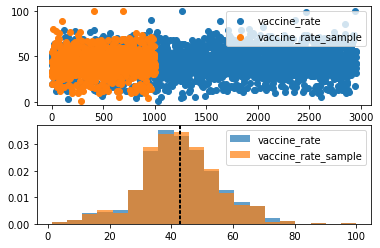

In [10]:
 # Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(vaccine_rate)), vaccine_rate, label="vaccine_rate")
plt.scatter(range(len(vaccine_rate_sample)), vaccine_rate_sample, label="vaccine_rate_sample")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(vaccine_rate, 20, density=True, alpha=0.7, label="vaccine_rate")
plt.hist(vaccine_rate_sample, 20, density=True, alpha=0.7, label="vaccine_rate_sample")
plt.axvline(vaccine_rate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(vaccine_rate_sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

plt.show()

In [12]:
# We can't reject that the sample mean is equal to population mean
st.ttest_1samp(vaccine_rate_sample, vaccine_rate.mean())

Ttest_1sampResult(statistic=-0.5999960391479249, pvalue=0.5486449426382265)